# Nonlinear Models

This notebook covers the following nonlinear transformations:
1. Linear-Log
2. Log-Linear
3. Log-Log
4. Polynomial



In [8]:
library(Ecdat)
data(Housing)

Loading required package: Ecfun

Attaching package: 'Ecfun'

The following object is masked from 'package:base':

    sign


Attaching package: 'Ecdat'

The following object is masked from 'package:datasets':

    Orange



In [9]:
str(Housing)

'data.frame':	546 obs. of  12 variables:
 $ price   : num  42000 38500 49500 60500 61000 66000 66000 69000 83800 88500 ...
 $ lotsize : num  5850 4000 3060 6650 6360 4160 3880 4160 4800 5500 ...
 $ bedrooms: num  3 2 3 3 2 3 3 3 3 3 ...
 $ bathrms : num  1 1 1 1 1 1 2 1 1 2 ...
 $ stories : num  2 1 1 2 1 1 2 3 1 4 ...
 $ driveway: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ recroom : Factor w/ 2 levels "no","yes": 1 1 1 2 1 2 1 1 2 2 ...
 $ fullbase: Factor w/ 2 levels "no","yes": 2 1 1 1 1 2 2 1 2 1 ...
 $ gashw   : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ airco   : Factor w/ 2 levels "no","yes": 1 1 1 1 1 2 1 1 1 2 ...
 $ garagepl: num  1 0 0 0 0 0 2 0 0 1 ...
 $ prefarea: Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...


In [10]:
head(Housing)

price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
42000,5850,3,1,2,yes,no,yes,no,no,1,no
38500,4000,2,1,1,yes,no,no,no,no,0,no
49500,3060,3,1,1,yes,no,no,no,no,0,no
60500,6650,3,1,2,yes,yes,no,no,no,0,no
61000,6360,2,1,1,yes,no,no,no,no,0,no
66000,4160,3,1,1,yes,yes,yes,no,yes,0,no


In [3]:
cities <- read.csv('Cities.csv')

In [4]:
head(cities)

Rank,CityState,Population2010,Population2012,Growth
1,New York City; New York,8175133,8336697,161564
2,Los Angeles; California,3792621,3857799,65178
3,Chicago; Illinois,2695598,2714856,19258
4,Houston; Texas,2099451,2160821,61370
5,Philadelphia; Pennsylvania,1526006,1547607,21601
6,Phoenix; Arizona,1445632,1488750,43118


## An example of a nonlinear relationship

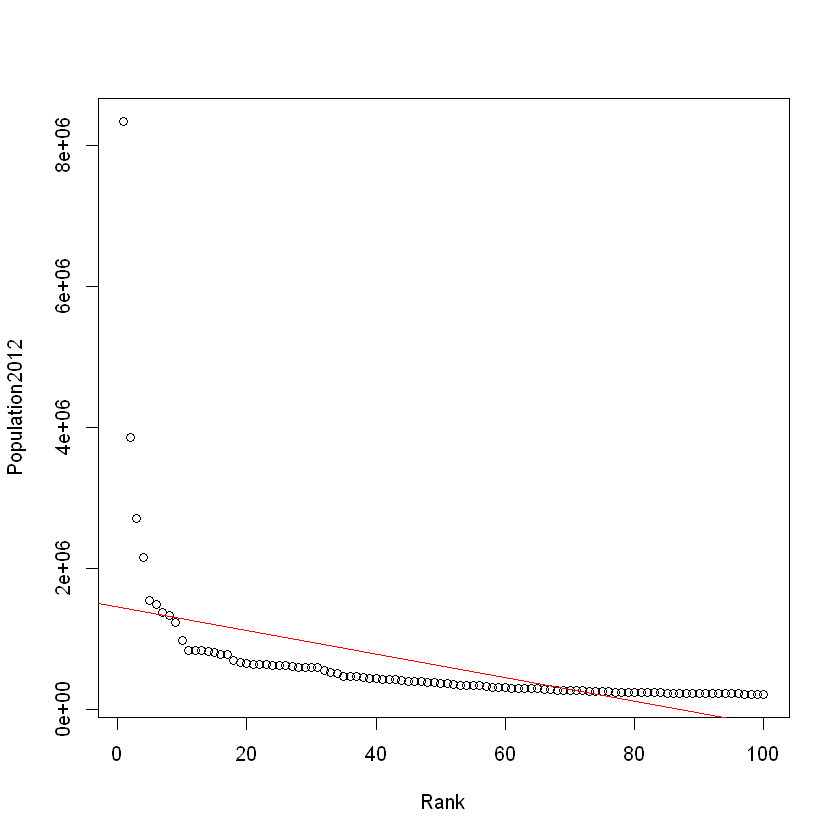

In [7]:
cities_pop_vs_rank <- lm(Population2012~Rank, cities)
with(cities, plot(Rank, Population2012))
abline(cities_pop_vs_rank, col="red")

As we can see a linear relationship is not going to fit this dataset very well!

## Model A: `Housing` dataset example

$price = b_{0} + b_{1}lotsize$

In this example we have heteroscedasticity present in the simple linear-linear model.

In [11]:
housing_model_a <- lm(price~lotsize,Housing)

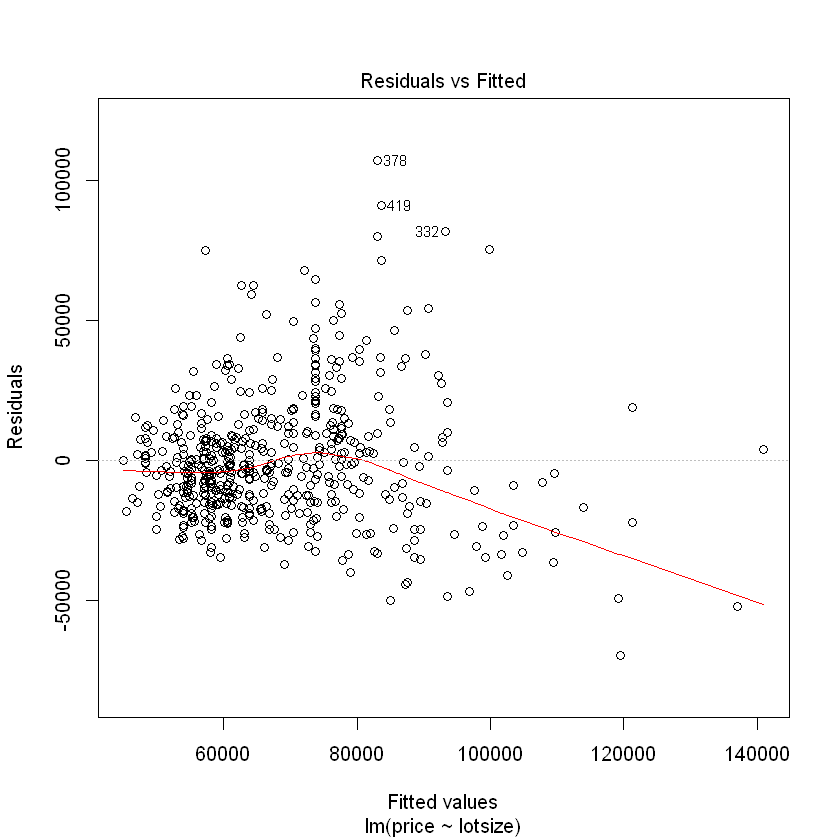

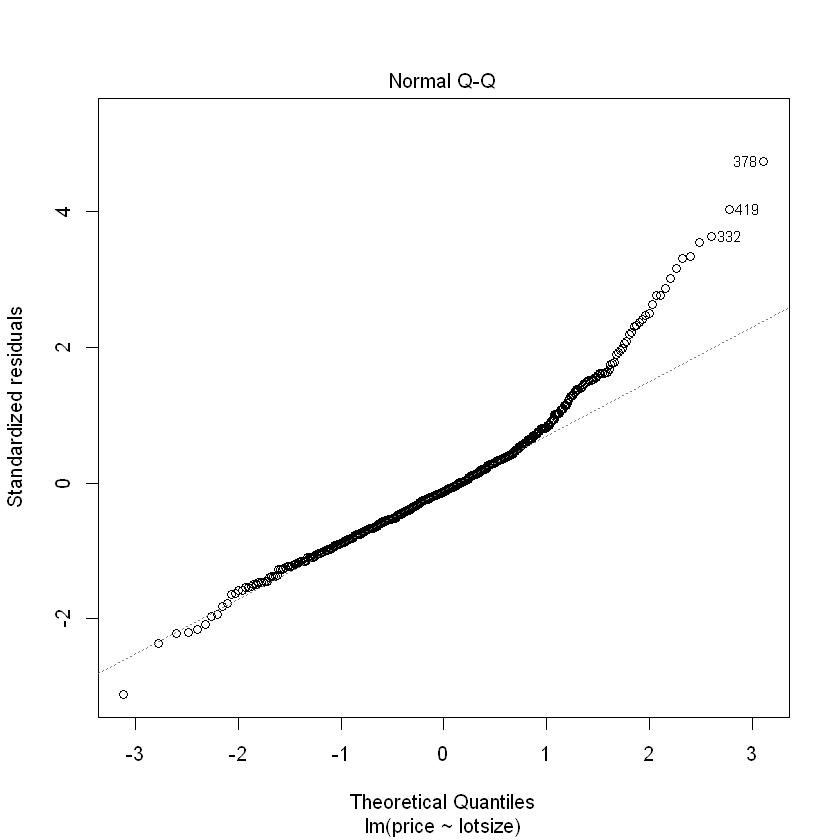

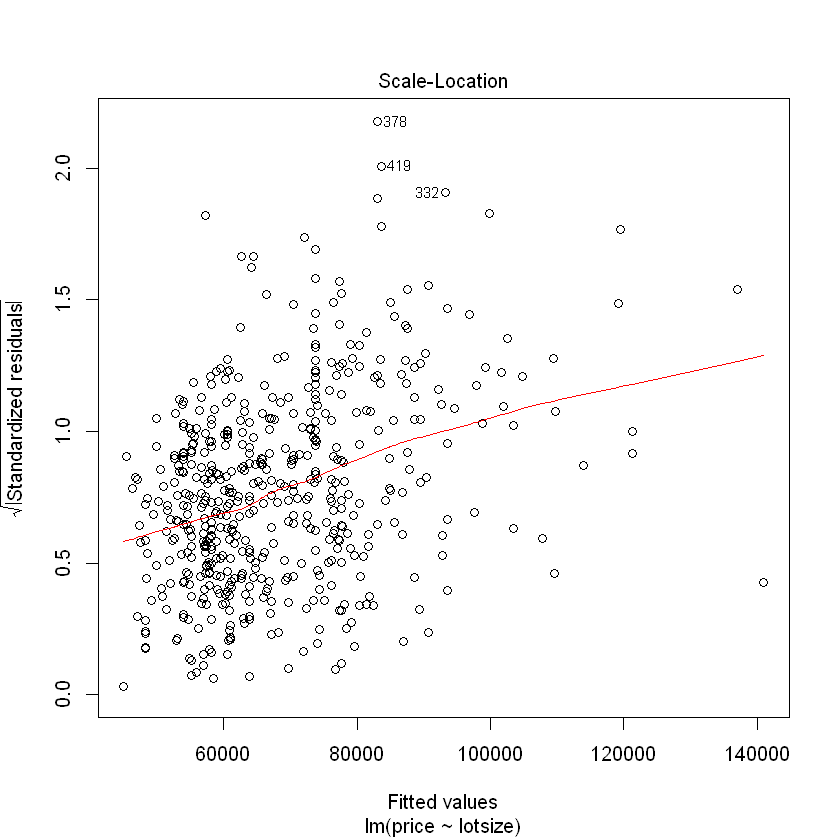

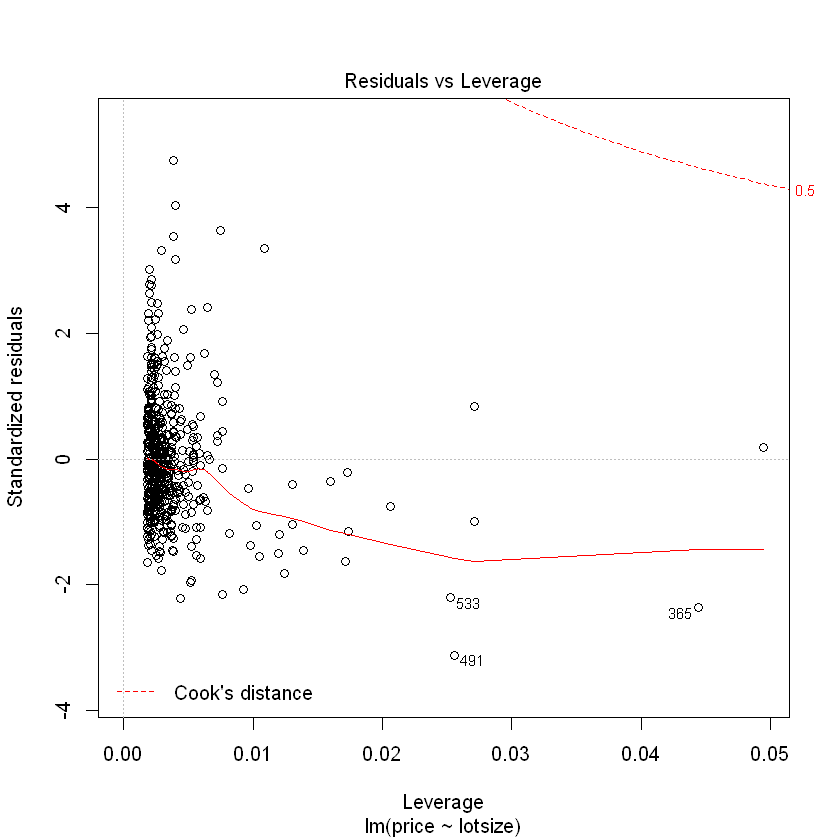

In [16]:
plot(housing_model_a)

The obvious cone shape in the Residuals Vs. Fitted plot above is our clue that [heteroscedasticity](https://www.medcalc.org/manual/heteroscedasticity.php) or unequal variance in our model is present. As `price` increases the relationship with `lotsize` is subject to increasing levels of variance.

Another clue is the Q-Q plot which is telling of non-linearity.

## Various Log Transformations

|        | Y                                                    | log(Y)                                                  |
|--------|------------------------------------------------------|---------------------------------------------------------|
| **X**      | Model A: Linear-Linear model $$Y = b_{0} + b_{1}*X$$   | Model C: Log-Linear model  $$log(Y) = b_{0} + b_{1}*X$$   |
| **log(X)** | Model B: Linear-Log model $$Y = b_{0} + b_{1}*log(X)$$ | Model D: Log-Log model  $$log(Y) = b_{0} + b_{1}*log(X)$$ |

* `log()` function in R computes natural log
* If variable *x* has zero values present then use `log(x+1)` transformation

## Model B: `Housing` dataset example

Linear-Log model

$price = b_{0} + b_{1}ln(lotsize)$

In [19]:
housing_model_b <- lm(price~log(lotsize),Housing)
summary(housing_model_b)


Call:
lm(formula = price ~ log(lotsize), data = Housing)

Residuals:
   Min     1Q Median     3Q    Max 
-55847 -14922  -2792  10966 105108 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -250728      20184  -12.42   <2e-16 ***
log(lotsize)    37660       2381   15.81   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22120 on 544 degrees of freedom
Multiple R-squared:  0.315,	Adjusted R-squared:  0.3137 
F-statistic: 250.1 on 1 and 544 DF,  p-value: < 2.2e-16


### Interpretting a Linear-Log model

Q: How do we interpret the coefficient of `log(lotsize)`?

A: When `lotsize` increases by 1%, `price` increases (on average) by $0.01*37660$ or $376.60.

***A 1% increase in the independent variable changes the dependent variable by $0.01b_{1}$***

* Increasing *X* by 1% is ~ equivalent to increasing `ln(X)` by 0.01 units
* So a 1% increase in *X* increases `ln(X)` by 0.01 and therefore changes the *Y* variable by $0.01b_{1}$

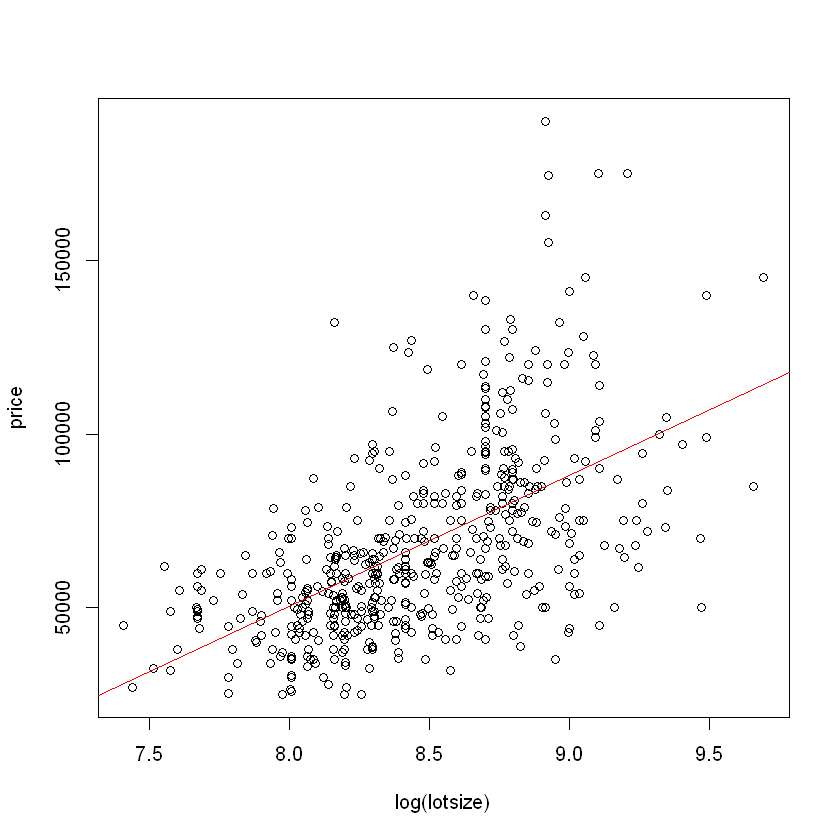

In [20]:
with(Housing, plot(log(lotsize), price))
abline(housing_model_b, col="red")

It appears as if heteroscedasticity is still present in our model.

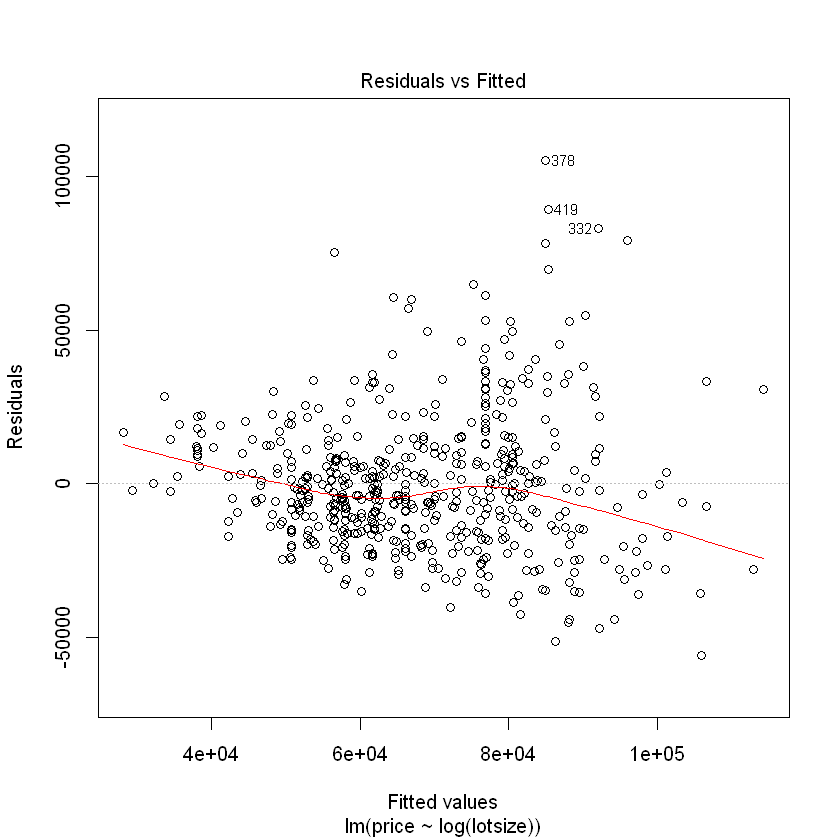

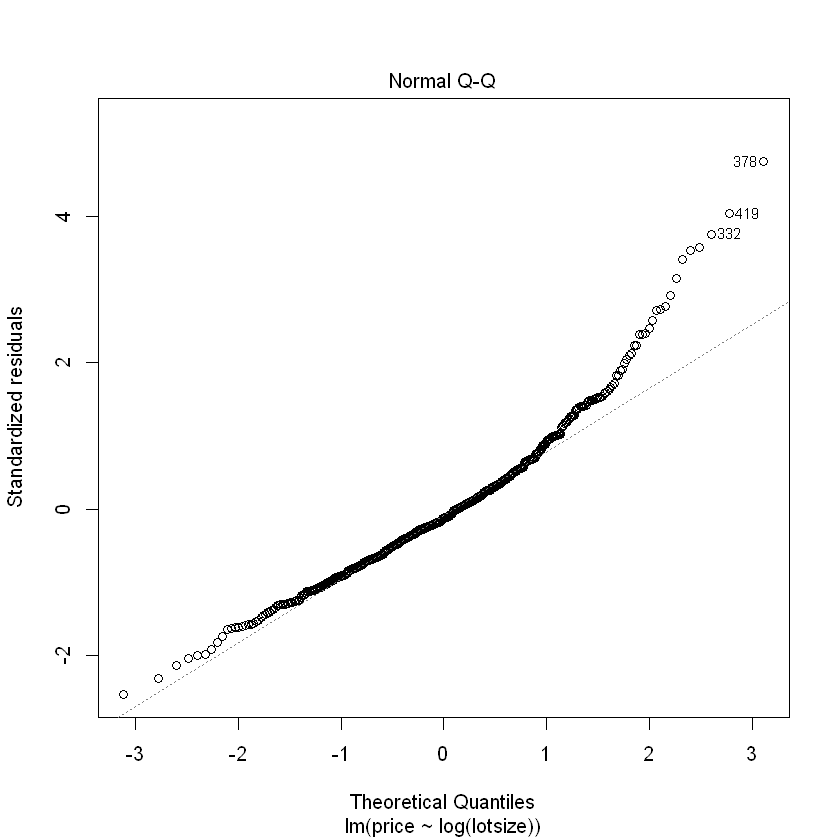

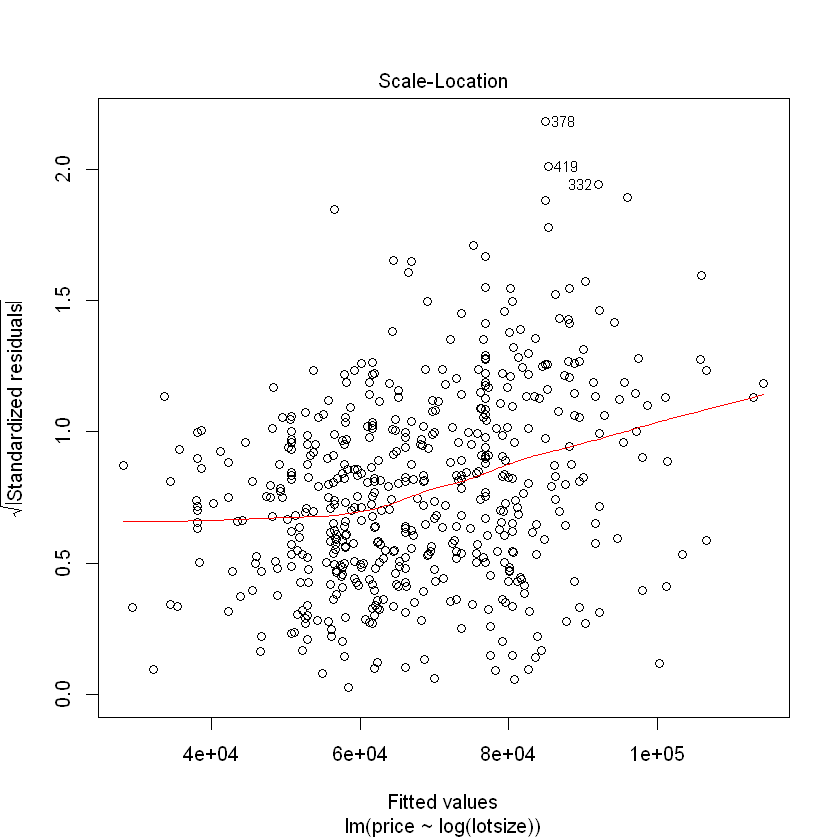

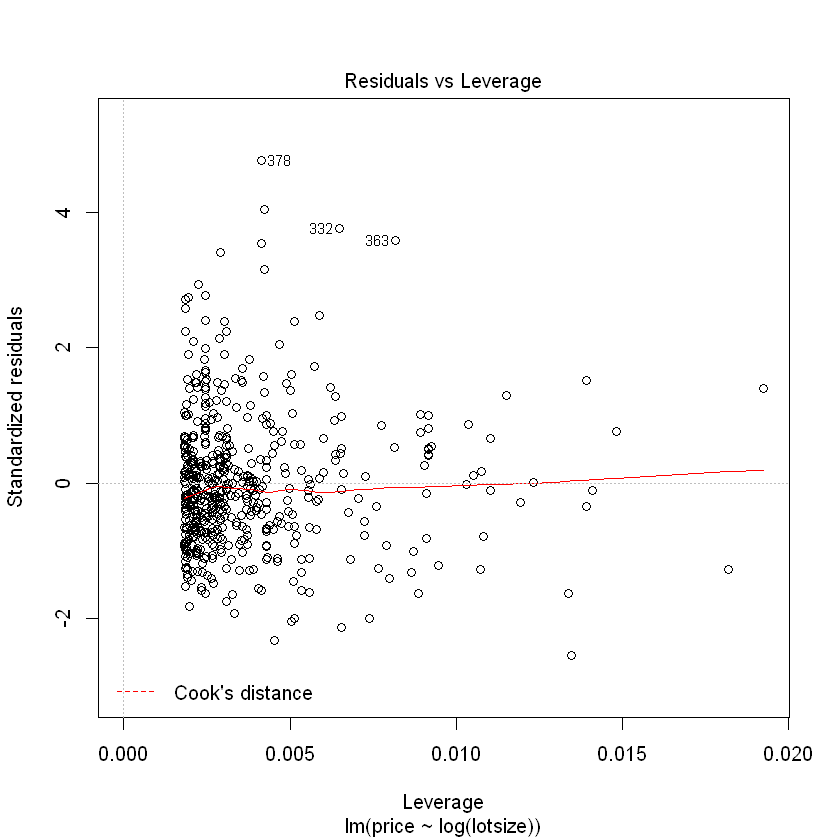

In [18]:
plot(housing_model_b)

We can confirm from the Residuals vs. Fitted plot and the Q-Q plot that heteroscedasticity is still present in our model, especially as `lotsize` increases.

## Model C: `Housing` dataset example

Log-Linear model

$ln(price) = b_{0} + b_{1}lotsize$

In [21]:
housing_model_c <- lm(log(price)~lotsize,Housing)
summary(housing_model_c)


Call:
lm(formula = log(price) ~ lotsize, data = Housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96513 -0.20552  0.00396  0.19758  0.88531 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.058e+01  3.451e-02  306.51   <2e-16 ***
lotsize     9.315e-05  6.177e-06   15.08   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3127 on 544 degrees of freedom
Multiple R-squared:  0.2947,	Adjusted R-squared:  0.2935 
F-statistic: 227.4 on 1 and 544 DF,  p-value: < 2.2e-16


### Interpretting a Log-Linear model

Q: How do we interpret the coefficient of `lotsize`?

A: When `lotsize` increases by 1 sq. ft, price increases by $100*0.00009315\% = 0.009315\%$ (on average)

***The dependent variable changes by 100*(coefficient)% for a one unit increase in the independent variable holding all other variables constant.***

* Increasing *x* by one unit will increase $ln(Y)$ by $b_{1}$ units
* The model $ln(Y) = b_{0}+b_{1}x$ is the same as $y=e^{b_{0}+b_{1}x}$
    * Taking the derivative $\frac{dy}{dx}=b_{1}y=\frac{dy}{y}=b_{1}dx$
    * Multiplying both sides by 100, we end up with $100*\frac{dy}{y}=100*b_{1}dx$
        * $100*\frac{dy}{y}$ is the percentage change in Y
        * If $dx=1$, then this one unit change in *x* leads to a $100*b_{1}$ percentage change in Y

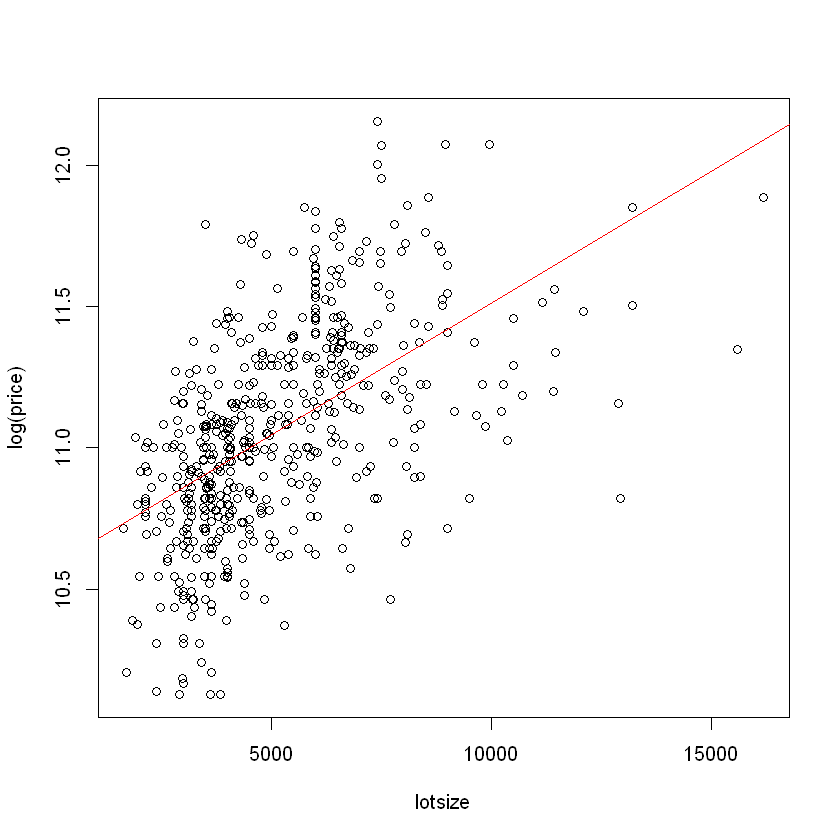

In [23]:
with(Housing, plot(lotsize, log(price)))
abline(housing_model_c, col="red")

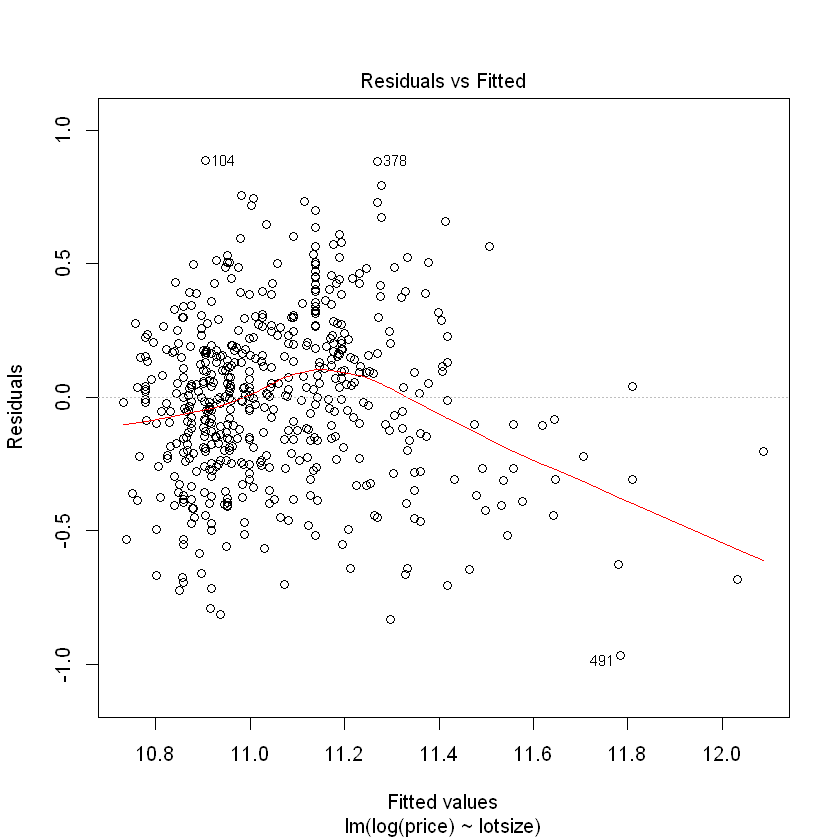

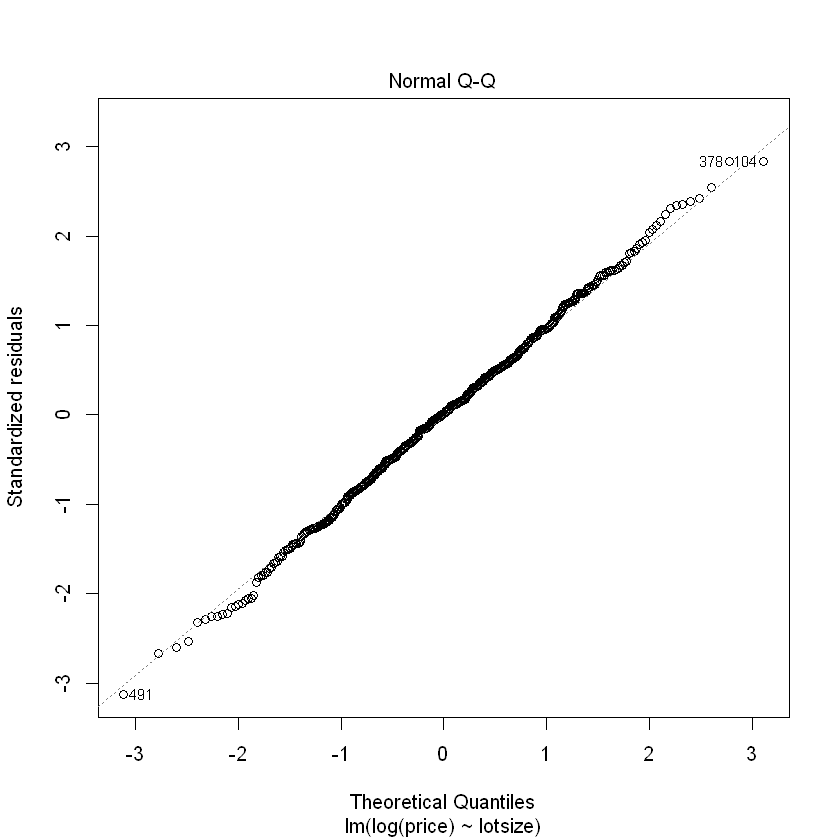

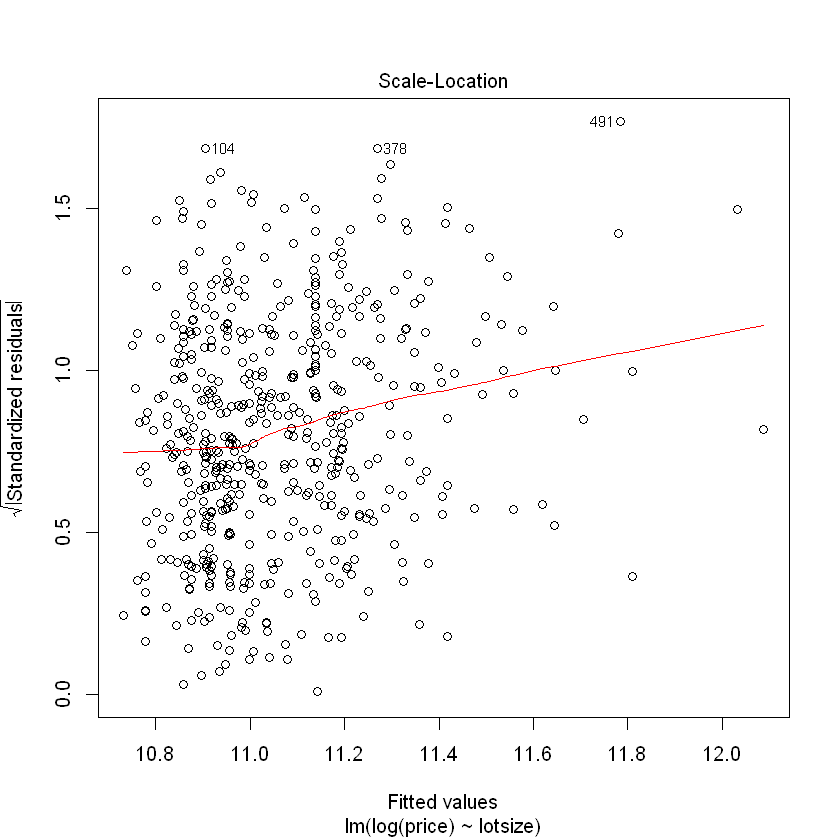

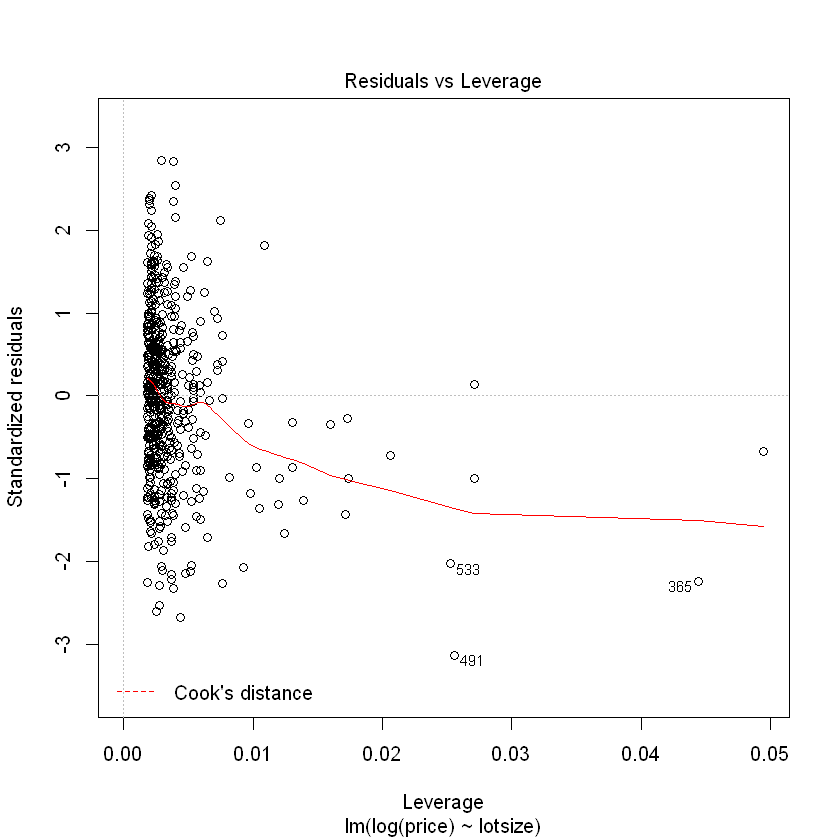

In [24]:
plot(housing_model_c)

We are getting closer! Our Q-Q plot looks good, but the Residuals vs. Fitted graph still exhibits heteroscedasticity present in our model for large values of `lotsize` and `price`.

## Model D: `Housing` dataset example

Log-Log model

$ln(price) = b_{0} + b_{1}ln(lotsize)$

In [25]:
housing_model_d <- lm(log(price)~log(lotsize),Housing)
summary(housing_model_d)


Call:
lm(formula = log(price) ~ log(lotsize), data = Housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85737 -0.19866  0.00396  0.19377  0.89756 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.46853    0.27674   23.37   <2e-16 ***
log(lotsize)  0.54218    0.03265   16.61   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3033 on 544 degrees of freedom
Multiple R-squared:  0.3364,	Adjusted R-squared:  0.3352 
F-statistic: 275.8 on 1 and 544 DF,  p-value: < 2.2e-16


### Interpretting a Log-Log model

Q: How do we interpret the coefficient of `lotsize`?

A: When lotsize increases by 1%, price increases (on average) by 0.54218%

***The dependent variable changes by $b_{1}$% for a 1% increase in the independent variable, holding all other variables constant.***

This phenomenom is reffered to as ***elasticity*** or the examination of the percent change in *Y* when *X* increases by one percent.
* $b_{1}$ captures ***elasticity*** in this case

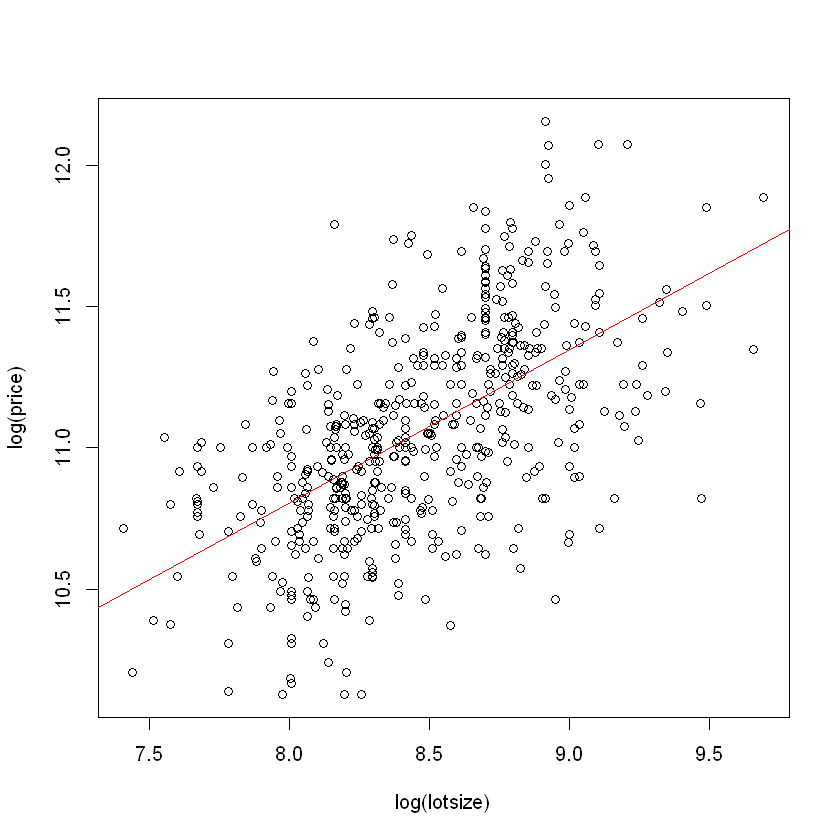

In [26]:
with(Housing, plot(log(lotsize), log(price)))
abline(housing_model_d, col="red")

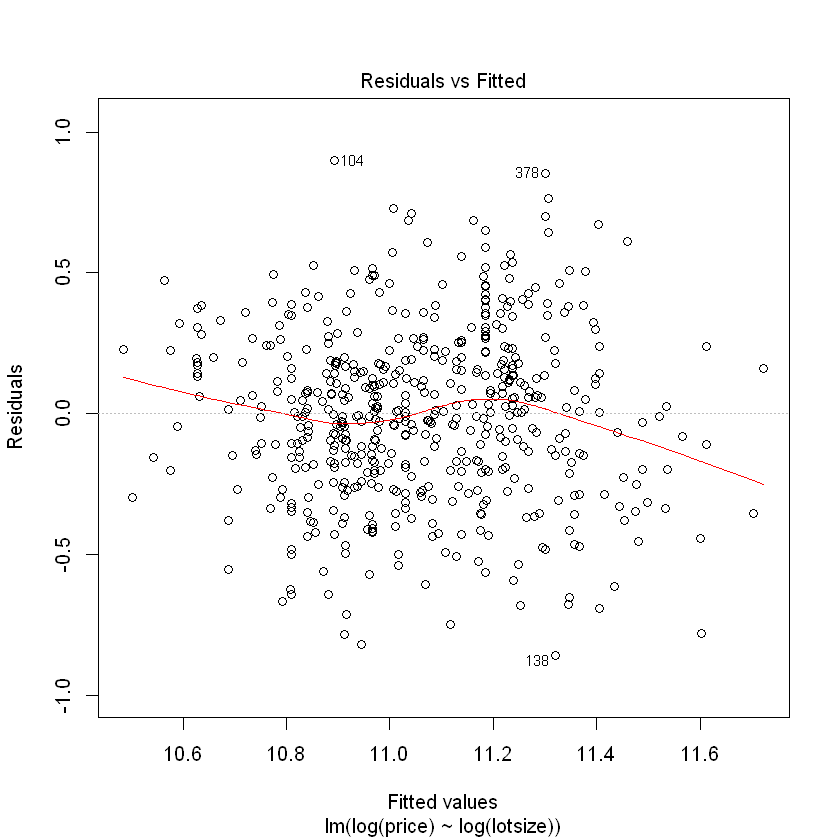

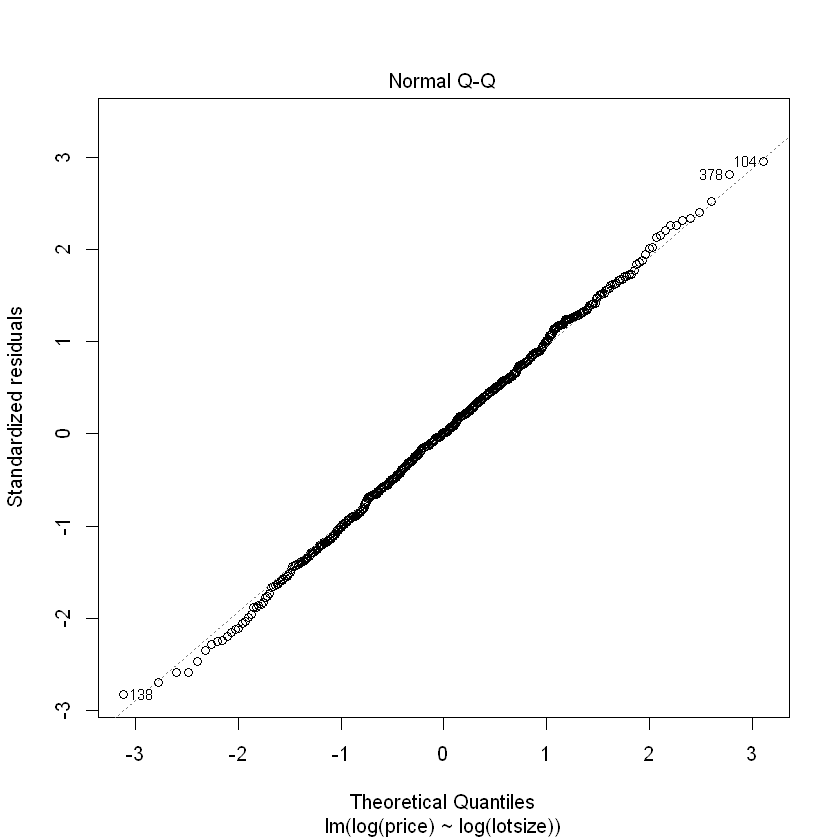

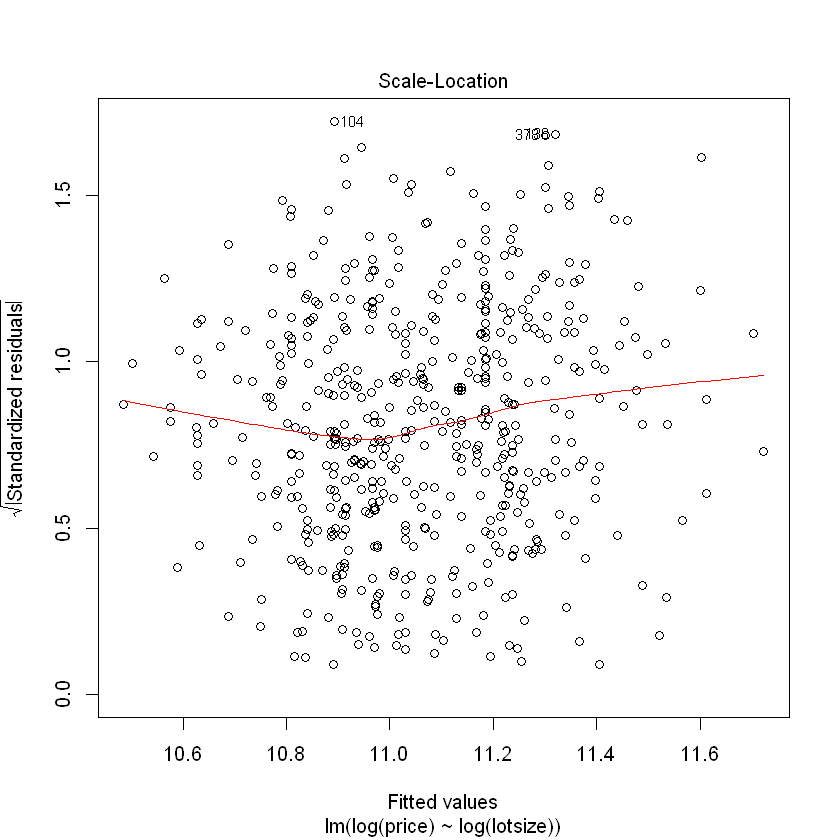

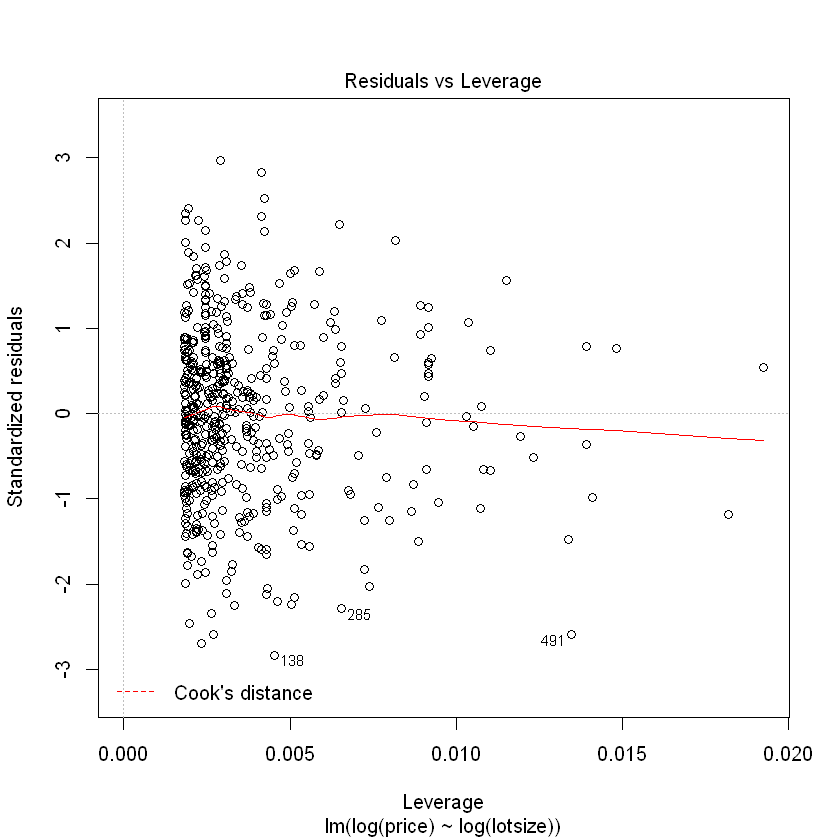

In [27]:
plot(housing_model_d)

Our plots above and the higher adjusted $R^{2}$ value seem to indicate that the Log-Log model is most appropriate for using lotsize to predict the price of a house!

## Reasons for log transforming data

* Achieve a more linear relationship
* Make distribution more normal
* Make variance more constant
* Better fit a model - increase $R^{2}$

## Model E: `Housing` dataset example

Polynomial quadratic model

$price = b_{0} + b_{1}lotsize + b_{2}lotsize^{2}$

In [32]:
Housing$lot_squared <- (Housing$lotsize)**2

In [33]:
housing_model_e <- lm(price~lotsize+lot_squared,Housing)
summary(housing_model_e)


Call:
lm(formula = price ~ lotsize + lot_squared, data = Housing)

Residuals:
   Min     1Q Median     3Q    Max 
-53363 -14335  -3069  10100 103142 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.134e+04  4.892e+03   2.317   0.0209 *  
lotsize      1.481e+01  1.589e+00   9.317  < 2e-16 ***
lot_squared -6.238e-04  1.162e-04  -5.370 1.17e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22010 on 543 degrees of freedom
Multiple R-squared:  0.323,	Adjusted R-squared:  0.3205 
F-statistic: 129.5 on 2 and 543 DF,  p-value: < 2.2e-16


### Interpretting a polynomial quadratic model

Q: How do we interpret the coefficient of `lotsize`?

A: Coefficients $b_{1}$ and $b_{2}$ cannot be interpreted individually because when `lotsize` increases by 1 unit, it is not possible (or meaningful) to hold $lotsize^{2}$ constant.

* Since $y = b_{0} + b_{1}x + b_{2}x^{2}$, differentiating both sides leads us to $$\frac{dy}{dx} = b_{1} + 2b_{2}x$$

***Thus it is impossible to do isolated interpretation of coefficients in a quadratic model***

* The slope (impact of 1 unit increase in *x* is not a constant. It changes at every point of the quadratic curve by the function defined above